In [1]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.9 torch-2.0.1 CPU
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 101.8/228.3 GB disk)


In [2]:
from ultralytics import YOLO
from IPython.display import display, Image

In [37]:
# Load a model
model = YOLO("yolov8s-cls.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='/Users/ldosnon/Desktop/data_yolov8/Peak_classification/ROI_classification.v2i.folder/', epochs=10, imgsz=640, batch=5, plots=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.9 torch-2.0.1 CPU
yolo/engine/trainer: task=classify, mode=train, model=yolov8s-cls.yaml, data=/Users/ldosnon/Desktop/data_yolov8/Peak_classification/ROI_classification.v2i.folder/, epochs=10, patience=50, batch=5, imgsz=640, save=True, cache=False, device=, workers=16, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, si

cation.v2i.folder/test/C/22-0_jpg.rf.5009b52d679afe7a516779261239ccc0.jpg


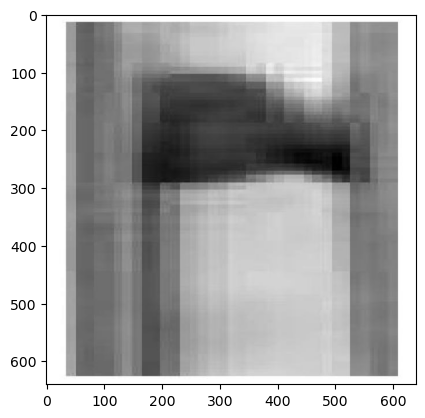

Ultralytics YOLOv8.0.20 🚀 Python-3.10.9 torch-2.0.1 CPU
YOLOv8s-cls summary (fused): 73 layers, 5079043 parameters, 0 gradients, 12.5 GFLOPs


CT
Maximum probability:  0.566149890422821
Class with maximum probability:  CT
cation.v2i.folder/test/C/25-35_jpg.rf.82e5daead48325eec8a56a014491211c.jpg


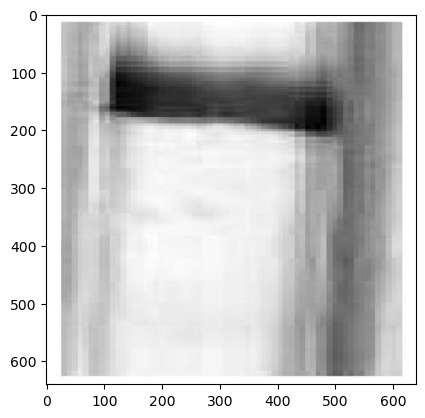

CT
Maximum probability:  0.5700691938400269
Class with maximum probability:  CT
cation.v2i.folder/test/C/17-0_jpg.rf.605d9e9c530aba834a1d45aa78ce072a.jpg


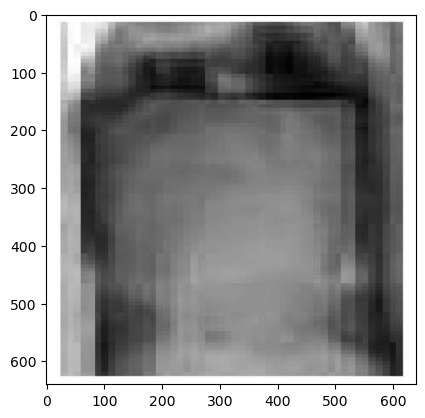

CT
Maximum probability:  0.5652579665184021
Class with maximum probability:  CT


In [64]:
import cv2
import matplotlib.image as mpimg
import os
import glob
import shutil
import matplotlib.pyplot as plt

model = YOLO('/Users/ldosnon/Desktop/runs/classify/train/weights/best.pt')  # load a custom model

list_files = os.listdir("/Users/ldosnon/Desktop/data_yolov8/Peak_classification/ROI_classification.v2i.folder/test/C")

for filename, i in zip(glob.glob("/Users/ldosnon/Desktop/data_yolov8/Peak_classification/ROI_classification.v2i.folder/test/C/*.jpg"),range(len(list_files))): #assuming gif
    inputimage= filename
    print(filename[67:])
    
    ori_img = mpimg.imread(filename)
    plt.imshow(ori_img)
    plt.show()
    
   
    results = model(filename)[0]
    results = results.probs.tolist()
    class_index = results.index(max(results))
    class_number = results.index(max(results))+1
    print(model.names[class_index])
    print("Maximum probability: ",max(results))
    print("Class with maximum probability: ",model.names[class_index])
    #return results.index(max(results))+1
    

  #os.remove('/content/drive/MyDrive/Colab Notebooks/database_for_ML/RZD_yolov8_database/test/results/prediction/' + filename[87:])

